In [15]:
# Find dates for all documents and remove those without

from cltk.data.fetch import FetchCorpus
corpus_downloader = FetchCorpus(language="lat")
corpus_downloader.import_corpus("lat_models_cltk")

In [24]:
count = 0
for doc in documents:
    count += len(doc[1].split())

count

13662489

In [2]:
import pandas as pd
from src.corpus import load_corpus
documents = load_corpus()

dates = pd.read_csv('LatLibDates-Filtered.csv')
documents_with_dates = []
all_dates = []

for doc in documents:
    title = doc[0][39:] # Chop off the file name
    if (dates['V1'] == title).any():
        date = dates[dates['V1'] == title].values[0][1]
        if date <= 13:
            # Convert to year
            date = -700 + date * 100
            all_dates.append(date)
            documents_with_dates.append(doc)
    else:
        print(f"Couldn't find {title}")
        
len(documents_with_dates)

Loading corpus...
Loaded 2141 texts.
Couldn't find epistaustras.txt
Couldn't find asserius.txt
Couldn't find appverg.catalepton.txt
Couldn't find xanten.txt
Couldn't find fragmentumlaurentianum.txt
Couldn't find dares1.txt
Couldn't find inscriptions.txt
Couldn't find appvergculex.txt
Couldn't find epitaphs.txt
Couldn't find cato.dis.txt
Couldn't find pulchracomis.txt
Couldn't find hymni.txt
Couldn't find baldo.txt
Couldn't find columba2.txt
Couldn't find diravi.txt
Couldn't find lucernarium.txt
Couldn't find appvergcomp.txt
Couldn't find carmenarvale.txt
Couldn't find columba1.txt
Couldn't find valesianus1.txt
Couldn't find index.txt
Couldn't find nivis.txt
Couldn't find carmensaliare.txt
Couldn't find dares.txt
Couldn't find appverg.aetna.txt
Couldn't find valesianus2.txt
Couldn't find appverg.ciris.txt
Couldn't find liberpontificalis1.txt
Couldn't find indices.txt
Couldn't find walton.txt
Couldn't find creeds.txt
Couldn't find donation.txt
Couldn't find precatio.txt
Couldn't find cae

1350

In [3]:
# Sort documents by date and split into bins
sorted_docs = sorted(zip(documents_with_dates, all_dates), key=lambda pair: pair[1])

num_bins = 10
bin_size = (max(all_dates) - min(all_dates))/num_bins
bin_counts = [0] * num_bins
current_bin = 1

# Separate docs into bins
for (doc, date) in sorted_docs:
    if date > (current_bin * bin_size) + min(all_dates):
        # Move to the next bin
        current_bin += 1
    bin_counts[current_bin - 1] += 1
bin_counts    

[2, 2, 32, 235, 446, 141, 65, 76, 193, 158]

In [4]:
# Preprocess documents
from cltk.tokenizers.lat.lat import LatinWordTokenizer
from cltk.lemmatize.lat import LatinBackoffLemmatizer
from cltk.stops.words import Stops
from tqdm.notebook import tqdm

stops = Stops(iso_code='lat').stops + ['punc', 'quod', 'se', 'sunt', 'esse', 'tibi', 'mihi', 'te', 'quid', 'me', 'hoc', 'cum2', 'meus', 'tuus', 'the', 'ejus', 'dig', 'iste', 'nunc', 'ed', 'ch', 'vel', 'cj', 'aa', 'pp', 'cth']

tokenizer = LatinWordTokenizer()
lemmatizer = LatinBackoffLemmatizer()

tokenized_documents = []
for document, date in tqdm(sorted_docs):
    text = document[1]
    tokenized = [token.lower() for token in tokenizer.tokenize(document[1])]
    lemmatized = [lemma[1] for lemma in lemmatizer.lemmatize(tokenized)]
    lemmatized = [token for token in lemmatized if token not in stops]
    tokenized_documents.append(lemmatized)

tokenized_documents[0]

  0%|          | 0/1350 [00:00<?, ?it/s]

['duodecim',
 'tabularis',
 'lex',
 'duodecim',
 'tabularis',
 'lex',
 'tabula',
 'eo',
 'ius',
 'voco',
 'eo',
 'ni',
 'eo',
 'antestamino',
 'em',
 'capito',
 'calvo',
 'pedo1',
 'struo',
 'manus',
 'endo',
 'jacio',
 'morbus',
 'aevitasve',
 'vitium',
 'ex-scio',
 'jumentum',
 'do',
 'nolo',
 'arcera',
 'sterno',
 'assiduus2',
 'vindex',
 'assiduus1',
 'proletarius',
 'cieo',
 'volo1',
 'vindex',
 'nex',
 'fortis',
 'sano',
 'res',
 'pacunt',
 'oro',
 'ni',
 'pacunt',
 'comitium',
 'forum',
 'meridio',
 'caussam',
 'coiciunto',
 'com',
 'peroro',
 'ambo',
 'praesens',
 'meridio',
 'praesens',
 'lito',
 'addico',
 'ambo',
 'praesens',
 'sol',
 'occido',
 'superus',
 'tempestas',
 'vado1',
 'subvades',
 'tabula',
 '<actor',
 'dico2',
 'sponsio',
 'do',
 'oportet',
 'aio',
 'quando',
 'nego',
 'praetor',
 'judico',
 'arbiter',
 'postulo',
 'uti',
 'des.',
 '. . .',
 'morbus',
 'sonticus',
 'status',
 'dies',
 'hostis',
 'judicium',
 'arbiter',
 'reor',
 'dies',
 'diffindo',
 'testimoni

In [5]:
# Create vector representations
from collections import defaultdict
from gensim import corpora

# remove words that appear only once
frequency = defaultdict(int)
for text in tokenized_documents:
    for token in text:
        frequency[token] += 1

texts = [
    [token for token in text if frequency[token] > 1] for text in tokenized_documents
]

# Create bag-of-words representations
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

print(corpus[0])

[(0, 1), (1, 6), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 2), (30, 1), (31, 4), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 9), (76, 1), (77, 7), (78, 1), (79, 2), (80, 1), (81, 5), (82, 2), (83, 1), (84, 3), (85, 7), (86, 1), (87, 5), (88, 1), (89, 6), (90, 1), (91, 4), (92, 1), (93, 1), (94, 2), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 2), (106, 1), (107, 3), (108, 2), (109, 1), (110, 1),

In [6]:
# Weight terms using tf-idf
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

print(corpus_tfidf[0])

[(1, 0.3200253773955731), (2, 0.0483437853874242), (3, 0.10255945287773244), (4, 0.041658467697003224), (5, 0.009471778124047163), (6, 0.0862272016016233), (7, 0.023892969934516006), (8, 0.19080306860532262), (9, 0.07168622830133821), (10, 0.007192987368803071), (11, 0.023833483253298305), (12, 0.01664023209511014), (13, 0.06787853619954727), (14, 0.12985012150247857), (15, 0.0244407349007901), (16, 0.009653507719778956), (17, 0.014688860473357188), (18, 0.021107493749901587), (19, 0.012551189482401703), (20, 0.01402185718565341), (21, 0.0862272016016233), (22, 0.057145255001053115), (23, 0.002389655794329793), (24, 0.00651830267573917), (25, 0.007058612973108086), (26, 0.0021799297890384424), (27, 0.024691657378567718), (28, 0.030285405135371632), (29, 0.008614428374492958), (30, 0.007850585407047382), (31, 0.0897083639272124), (32, 0.01427887039304532), (33, 0.08086056100237622), (34, 0.0862272016016233), (35, 0.03675628753544711), (36, 0.017791894171602235), (37, 0.01047117829125438

In [7]:
# Let's inspect the top 8 topics
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=8)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf] 
lsi_model.print_topics(20)

[(0,
  '0.122*"uideo" + 0.082*"uolo" + 0.082*"uerus" + 0.080*"deus" + 0.077*"caesar" + 0.069*"consul" + 0.067*"romanus" + 0.063*"uir" + 0.062*"senatus" + 0.062*"bellum"'),
 (1,
  '0.879*"dig." + 0.334*"ulpianus" + 0.098*"heres" + 0.077*"paulus1" + 0.074*"sab" + 0.057*"hereditas" + 0.053*"actio" + 0.048*"papinianus" + 0.047*"iulianus" + 0.045*"fideicommitto"'),
 (2,
  '0.122*"periocha" + -0.119*"uideo" + 0.115*"consul" + 0.112*"marcus" + 0.108*"senatus" + 0.108*"caius" + -0.107*"dig." + 0.101*"antonius" + -0.099*"unda" + 0.098*"caesar"'),
 (3,
  '0.206*"christus" + 0.148*"deus" + -0.138*"periocha" + 0.121*"angelus" + 0.119*"uerus" + 0.118*"apostolus" + 0.103*"spiritus" + -0.098*"consul" + 0.094*"ecclesia" + 0.091*"dominus"'),
 (4,
  '-0.258*"uideo" + -0.201*"uerus" + -0.185*"uolo" + -0.178*"periocha" + -0.142*"uenio" + -0.139*"uita" + -0.138*"christus" + -0.127*"ciuitas" + -0.124*"aduersus" + -0.119*"livy"'),
 (5,
  '0.412*"aa." + 0.314*"conss" + 0.314*"<a" + 0.236*"conss.>" + 0.214*"au

In [11]:
from gensim.models import LdaSeqModel
import logging

logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

# Actually train the model
# If you have a pretrained model, you can skip ahead
ldaseq = LdaSeqModel(corpus=corpus_tfidf, time_slice=bin_counts, id2word=dictionary.id2token, num_topics=8, chunksize=1)

INFO : using symmetric eta at 0.125
INFO : using serial LDA version on this node
INFO : running online (multi-pass) LDA training, 8 topics, 10 passes over the supplied corpus of 1350 documents, updating model once every 1350 documents, evaluating perplexity every 1350 documents, iterating 50x with a convergence threshold of 0.001000
INFO : -32.992 per-word bound, 8544219353.3 perplexity estimate based on a held-out corpus of 1350 documents with 29125 words
INFO : PROGRESS: pass 0, at document #1350/1350
INFO : topic #7 (0.300): 0.000*"dig." + 0.000*"uideo" + 0.000*"periocha" + 0.000*"unda" + 0.000*"caius" + 0.000*"deus" + 0.000*"ulpianus" + 0.000*"uerus" + 0.000*"aequor" + 0.000*"dominus"
INFO : topic #1 (0.300): 0.000*"periocha" + 0.000*"caesar" + 0.000*"uideo" + 0.000*"senatus" + 0.000*"livy" + 0.000*"publicus" + 0.000*"consul" + 0.000*"caius" + 0.000*"deus" + 0.000*"uolo"
INFO : topic #2 (0.300): 0.000*"deus" + 0.000*"uideo" + 0.000*"uerus" + 0.000*"scr." + 0.000*"uolo" + 0.000*"dic

In [8]:
from gensim.test.utils import datapath

# Save the model to disk
temp_file = datapath("ldaseq")
ldaseq.save(temp_file)

NameError: name 'ldaseq' is not defined

In [10]:
from gensim.models import LdaSeqModel
from gensim.test.utils import datapath

# Load a saved model
temp_file = datapath("ldaseq")
ldaseq = LdaSeqModel.load(temp_file)

In [11]:
ldaseq.print_topics()

[[('uideo', 0.0011991764856080671),
  ('deus', 0.0010345410098472146),
  ('caesar', 0.0009939693970400037),
  ('uolo', 0.0009862817163044486),
  ('uerus', 0.0009722637013211101),
  ('christus', 0.000872659181369916),
  ('dico', 0.0008329668922749198),
  ('publicus', 0.0008320446278527186),
  ('consul', 0.0008257027280844083),
  ('senatus', 0.000804682647418064),
  ('romanus', 0.0008026335915273035),
  ('verus', 0.0007935063829879605),
  ('video', 0.000762135424658664),
  ('cicero', 0.0007184544796294428),
  ('bellum', 0.0007178948083375037),
  ('exercitus', 0.0007152026993499293),
  ('uenio', 0.0007151178644142142),
  ('uita', 0.0007118839106576641),
  ('caius', 0.0007059852910216809),
  ('volo', 0.0007004469965083191)],
 [('dig.', 0.010785178168511725),
  ('ulpianus', 0.004759413769425306),
  ('unda', 0.002828683898815769),
  ('aequor', 0.002702327365136771),
  ('tellus', 0.0023523852280410286),
  ('pectus', 0.0021146576598515196),
  ('ensis', 0.002099587008115928),
  ('uideo', 0.0020

In [14]:
import pyLDAvis
from pyLDAvis import gensim_models

# Use pyLDAvis to visualize the (static) distribution
pyLDAvis.enable_notebook()
doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=1, corpus=corpus)
vis_dtm = pyLDAvis.prepare(topic_term_dists=topic_term, doc_topic_dists=doc_topic, doc_lengths=doc_lengths, vocab=vocab, term_frequency=term_frequency)
pyLDAvis.display(vis_dtm)

In [32]:
pyLDAvis.save_json(vis_dtm, './results/LDA/lda.json')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.06841841010143487
0.04376206667884171
0.026961831220548536
0.02680647804007129
0.014383647848290233
0.014273742362698547
0.013444947339313593
0.009619561118269589


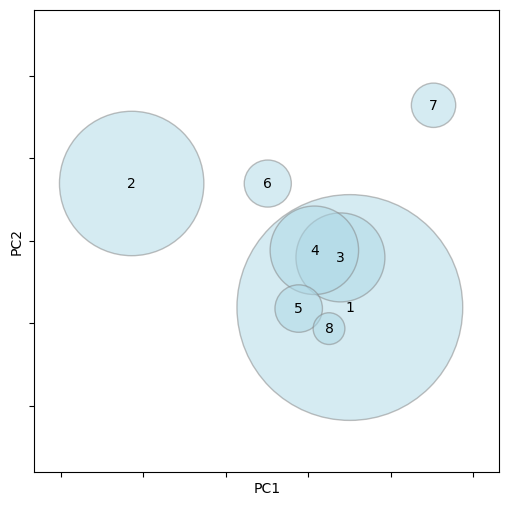

In [34]:
import json
import math
import matplotlib.pyplot as plt

# Convert image to json so we can create an svg
with open('./results/LDA/lda.json', 'r') as myfile:
    data=myfile.read()

json_data = json.loads(data)


plt.figure(figsize=(6,6))

x_data = json_data['mdsDat']['x']
y_data = json_data['mdsDat']['y']
freq_data = json_data['mdsDat']['Freq']

x_min, x_max = min(x_data), max(x_data)
y_min, y_max = min(y_data), max(y_data)
x_range = x_max - x_min
y_range = y_max - y_min

plt.axis([-0.17, 0.12, -0.14, 0.14])
plt.axis("equal")

plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', left=True, right=False, labelleft=False)
plt.xlabel('PC1')
plt.ylabel('PC2')


# Depending on the number of topics, you may need to tweak the paremeters (e.g. the size of circles be Freq/100 or Freq/200, etc)

for i in range(len(json_data['mdsDat']['x'])):
    radius = math.log(freq_data[i] * 3) / 80
    circle = plt.Circle((x_data[i], y_data[i]), radius=radius, edgecolor='grey', 
                        facecolor='lightblue', 
                        alpha=0.5)
    plt.gca().add_artist(circle)
    print(radius)
    
    plt.text(x_data[i], y_data[i], str(i + 1), ha='center', va='center')  # label topics

    
plt.savefig("lda_intertopic.eps", format = 'eps', bbox_inches='tight')

    
plt.show()

In [13]:
import numpy as np

# Iterate over buckets and calculate the average frequency of each topic for docs in that bin
index = 0
topic_data = []
for timestep in range(10):
    doc_topic, topic_term, doc_lengths, term_frequency, vocab = ldaseq.dtm_vis(time=timestep, corpus=corpus)
    # topic_means = doc_topic[index:index + bin_counts[timestep]].mean(axis=0)
    topic_counts = np.bincount(doc_topic[index:index + bin_counts[timestep]].argmax(axis=1), minlength=8)
    topic_data.append(topic_counts)

topic_data = np.stack(topic_data)
topic_data.shape

(10, 8)

In [53]:
bin_counts

[2, 2, 32, 235, 446, 141, 65, 76, 193, 158]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


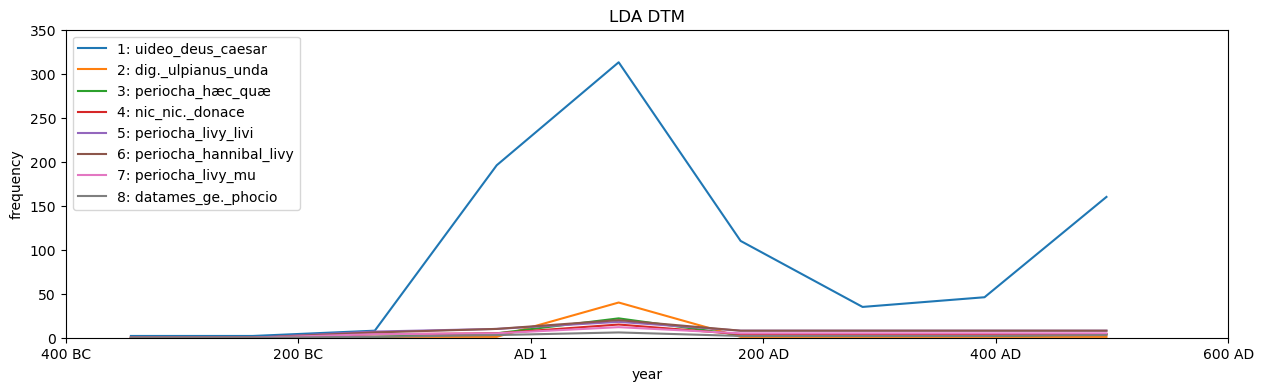

In [14]:
import matplotlib.pyplot as plt

# Create the x axis values
# We multiply by 10 and then divide because range doesn't support non-integer steps
x = [val/10 for val in range(-4490 + 1049, 6000 + 1049, 1049)]

plt.rcParams["figure.figsize"] = (15,4)

# Plot each topic's frequency over time
for topic in range(8):
    label = ldaseq.print_topics()[topic]
    label = f"{topic + 1}: " + '_'.join([term[0] for term in label[:3]])
    plt.plot(x[:-1], topic_data[:-1,topic], label=label)

plt.axis([-400, 600, 0, 350])

ticks = plt.xticks()[0]
labels = []
for tick in ticks:
    if tick < 0:
        labels.append(f"{int(abs(tick))} BC")
    elif tick == 0:
        labels.append("AD 1")
    else:
        labels.append(f"{int(tick)} AD")
plt.xticks(ticks, labels)


plt.legend()
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('LDA DTM')

plt.savefig("lda_topics_over_time.eps", format = 'eps', bbox_inches='tight')

plt.show()

In [89]:
from src.embedder import topic_coherence

s = ldaseq.print_topics()
total = 0
for i in range(5):
    print(f"Topic {i}: {topic_coherence([term[0] for term in s[i][:10]])}")
    total += topic_coherence([term[0] for term in s[i][:10]])

total / 5

Topic 0: 0.21388638871056692
Topic 1: 0.16197085173593628
Topic 2: 0.2225587378655161
Topic 3: 0.2127494513988495
Topic 4: 0.23549487392107646


0.20933206072638905

In [90]:
from src.embedder import mean_pairwise_jaccard

mean_pairwise_jaccard([[term[0] for term in s[i][:10]] for i in range(5)])

0.01637426900584795